In [1]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io
import sys

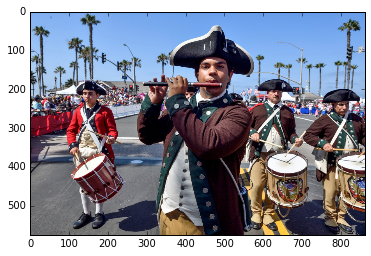

In [2]:
img = mpimg.imread('./test.png')
imgplt = plt.imshow(img)
plt.show(imgplt)

In [3]:
win = dlib.image_window()
detector = dlib.get_frontal_face_detector()
img2 = io.imread('./test.png')

# The 1 in the second argument indicates that we should upsample the image
# 1 time.  This will make everything bigger and allow us to detect more
# faces.
detected = detector(img2, 1)
print("Number of faces detected: {}".format(len(detected)))

Number of faces detected: 4


In [4]:
for i, d in enumerate(detected):
    print("Detection {}: Left:{} Top:{} Right:{} Bottom:{}".format(i, d.left(), d.top(), d.right(), d.bottom()))
    crop_img = img2[d.top():d.bottom(),d.left():d.right()]
    cv2.imwrite("./face"+str(i)+".png", crop_img)

Detection 0: Left:785 Top:230 Right:821 Bottom:266
Detection 1: Left:424 Top:116 Right:514 Bottom:206
Detection 2: Left:127 Top:194 Right:170 Bottom:238
Detection 3: Left:613 Top:194 Right:649 Bottom:230


In [5]:
win.clear_overlay()
win.set_image(img2)
win.add_overlay(detected)
dlib.hit_enter_to_continue()

In [6]:
# Finally, if you really want to you can ask the detector to tell you the score
# for each detection.  The score is bigger for more confident detections.
# The third argument to run is an optional adjustment to the detection threshold,
# where a negative value will return more detections and a positive value fewer.
# Also, the idx tells you which of the face sub-detectors matched.  This can be
# used to broadly identify faces in different orientations.
dets, scores, idx = detector.run(img2, 1, -1)
for i, d in enumerate(dets):
    print("Detection {}, score: {}, face_type:{}".format(
        d, scores[i], idx[i]))

Detection [(785, 230) (821, 266)], score: 1.19632897722, face_type:2.0
Detection [(424, 116) (514, 206)], score: 0.987259212924, face_type:0.0
Detection [(127, 194) (170, 238)], score: 0.71144343961, face_type:1.0
Detection [(613, 194) (649, 230)], score: 0.684678414931, face_type:2.0
Detection [(195, 106) (285, 196)], score: -0.231833359132, face_type:2.0
Detection [(645, 430) (688, 473)], score: -0.514487680005, face_type:0.0
Detection [(366, 401) (417, 452)], score: -0.564505637661, face_type:3.0
Detection [(344, 425) (434, 514)], score: -0.743367494122, face_type:3.0
Detection [(128, 301) (190, 364)], score: -0.753822024869, face_type:0.0
Detection [(93, 66) (156, 129)], score: -0.862339080349, face_type:3.0
Detection [(-17, 32) (52, 94)], score: -0.909332841672, face_type:4.0
Detection [(573, 382) (616, 425)], score: -0.914265772233, face_type:2.0
Detection [(371, 372) (415, 415)], score: -0.935752805279, face_type:0.0
Detection [(-12, 108) (36, 151)], score: -0.971244474778, face